# Credit Card Customer Segmentation
Attempt at grouping credit card customers exhibiting simillar behaviour into same clusters.

## Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

## Importing Data

In [4]:
df = pd.read_csv('Credit Card Customer Data.csv')
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


## Data Preprocessing

In [15]:
X = df.iloc[:,2:]

ct = ColumnTransformer(transformers=[('encoder',StandardScaler(),[0,1,2,3,4])],remainder='passthrough',sparse_threshold=0)
X = np.array(ct.fit_transform(X))
X

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

## Training

C:\Users\jatin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


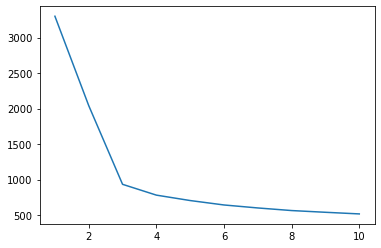

In [18]:
wcss = []
for i in range(1,11):
    kmeans_clst = KMeans(i,init='k-means++',random_state=0)
    kmeans_clst.fit(X)
    wcss.append(kmeans_clst.inertia_)
    
plt.plot(range(1,11),wcss)

In [41]:
kmeans_clst = KMeans(3,init='k-means++',random_state=0)
kmeans_clst.fit(X)
y = np.array(kmeans_clst.predict(X))

## Visualising customer data with new clusters

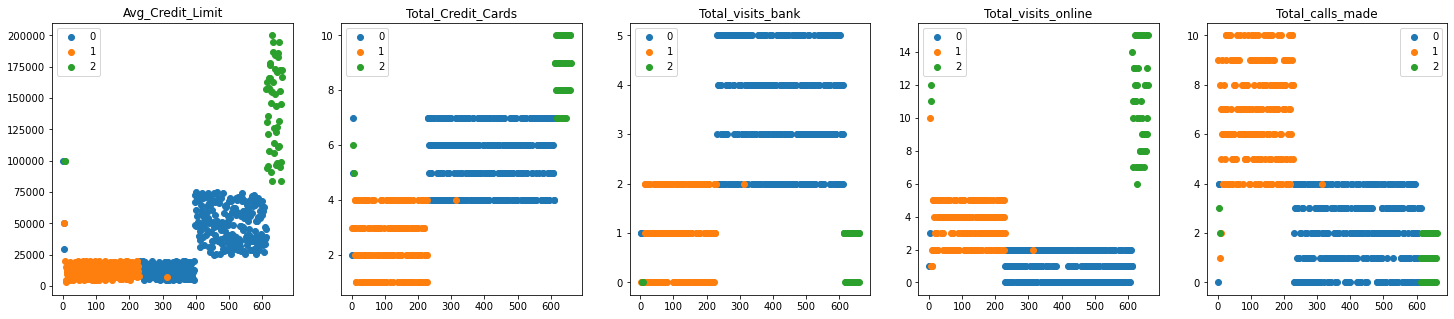

In [46]:
fig,ax = plt.subplots(1,5,figsize=(25,5))
for i in range(5):
    for j in range(3):
        ax[i].scatter(df.iloc[y==j,0],df.iloc[y==j,i+2],label=j)
    ax[i].title.set_text(df.columns[i+2])
    ax[i].legend()

## Insights

- Cluster 0 has low/medium credit limit, 4-7 cards and prefer visit bank rather than online or phone interactions
- cluster 1 has low credit limt, 1-4 cards and prefer phone calls over in-person & online interactions
- Cluster 2 has medium/high credit limit, 7-10 cards and prefer Online interaction over other mediums.